In [11]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress, skew
import datetime
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy

(c1,c2,c3,c4)=('#1b9e77','#d95f02','#7570b3','#e7298a')

In [12]:
df = pickle.load(open('big_df.p','rb'))

df_night = df[df['zenith']>90]
df_day = df[df['zenith']<90]

print(df_night.shape[0]/(df_day.shape[0]+df_night.shape[0]))

day = []
night = []

for month in np.arange(1,13):
    
    day.append( df_day[df_day['month']==month].shape[0] )
    night.append( df_night[df_night['month']==month].shape[0] )

0.7640507719533777


/tmp/ipykernel_3426/617060539.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(np.arange(0,16001,2000),fontsize='large')


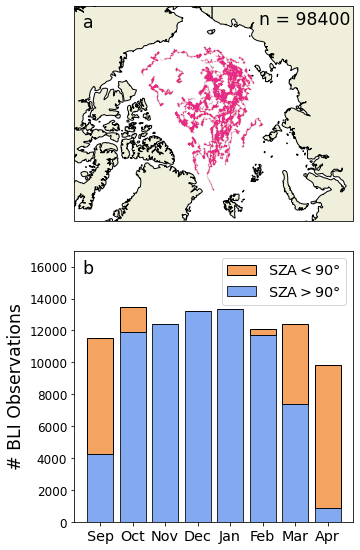

In [13]:
fig = plt.figure(figsize=(5,10))


ax1 = plt.subplot(2,1,1,projection=ccrs.NorthPolarStereo())
ax2 = plt.subplot(2,1,2)

ax1.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

ax1.set_extent([-2.633e+06, 2.696e+06, -1.5e6, 2.6e+06], crs=ccrs.NorthPolarStereo()) 

ax1.scatter(df['Longitude'],df['Latitude'],
            transform=ccrs.PlateCarree(),
            zorder=0,
            s=0.01,
            alpha=0.2,
            color=c4
            )

ax1.annotate(f'a',
             xycoords='axes fraction',
             xy=(0.03,0.97),
             va='top',
             fontsize='xx-large')


ax1.annotate(f'n = {df.shape[0]}',
             xycoords='axes fraction',
             xy=(0.99,0.98),
             va='top',
             ha='right',
             fontsize='xx-large')


#### AX2

ax2.bar(np.arange(8),day[8:]+day[:4],bottom=night[8:]+night[:4],
        label='SZA$<$90$\degree$',color='sandybrown',edgecolor='k')
ax2.bar(np.arange(8),night[8:]+night[:4],color='cornflowerblue',
        label='SZA$>$90$\degree$',alpha=0.8,edgecolor='k')
ax2.legend(fontsize='x-large')
ax2.set_xticks(range(8))
ax2.set_xticklabels(['Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr'],fontsize='x-large')
ax2.set_ylim(0,17000)
ax2.set_ylabel('# BLI Observations',fontsize='xx-large')
ax2.set_yticklabels(np.arange(0,16001,2000),fontsize='large')


ax2.annotate(f'b',
             xycoords='axes fraction',
             xy=(0.03,0.97),
             va='top',
             fontsize='xx-large')


plt.subplots_adjust(hspace=0.005)


# plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/Inversion/F1.png',
#             dpi=400,
#             bbox_inches='tight')

In [14]:
df_tv = df[df.index>datetime.datetime(1986,7,1)]
df_tv = df_tv[df_tv.index<datetime.datetime(1988,7,1)]
df_tv = df_tv[np.isin(df_tv['month'],[1,2,12])]

In [15]:
df_tv_night = df_tv[df_tv['zenith']>90]
df_tv_day = df_tv[df_tv['zenith']<90]

print(df_tv_night.shape[0]/(df_tv_day.shape[0]+df_tv_night.shape[0]))

tv_day = []
tv_night = []

for month in np.arange(1,13):
    
    tv_day.append( df_tv_day[df_tv_day['month']==month].shape[0] )
    tv_night.append( df_tv_night[df_tv_night['month']==month].shape[0] )

0.99029933481153


/tmp/ipykernel_3426/835927862.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(np.arange(0,16001,2000),fontsize='large')
/tmp/ipykernel_3426/835927862.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(np.arange(0,16001,2000),fontsize='large')


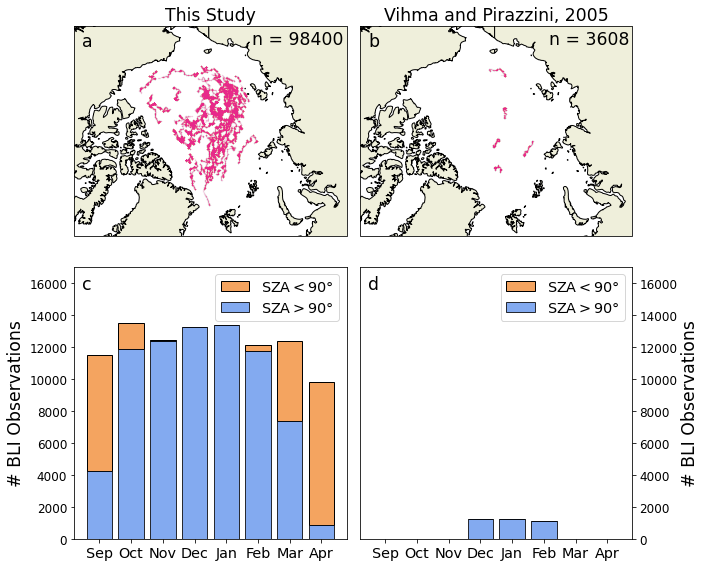

In [16]:
fig = plt.figure(figsize=(10,10))


ax1 = plt.subplot(2,2,2,projection=ccrs.NorthPolarStereo())
ax2 = plt.subplot(2,2,4)

ax3 = plt.subplot(2,2,1,projection=ccrs.NorthPolarStereo())
ax4 = plt.subplot(2,2,3)

ax1.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

ax1.set_extent([-2.633e+06, 2.696e+06, -1.5e6, 2.6e+06], crs=ccrs.NorthPolarStereo()) 

ax1.scatter(df_tv['Longitude'],
            df_tv['Latitude'],
            transform=ccrs.PlateCarree(),
            zorder=0,
            s=0.01,
            alpha=0.2,
            color=c4
            )

ax1.annotate(f'b',
             xycoords='axes fraction',
             xy=(0.03,0.97),
             va='top',
             fontsize='xx-large')


ax1.annotate(f'n = {df_tv.shape[0]}',
             xycoords='axes fraction',
             xy=(0.99,0.98),
             va='top',
             ha='right',
             fontsize='xx-large')


#### AX2

ax2.bar(np.arange(8),tv_day[8:]+tv_day[:4],bottom=tv_night[8:]+tv_night[:4],
        label='SZA$<$90$\degree$',color='sandybrown',edgecolor='k')
ax2.bar(np.arange(8),tv_night[8:]+tv_night[:4],color='cornflowerblue',
        label='SZA$>$90$\degree$',alpha=0.8,edgecolor='k')
ax2.legend(fontsize='x-large')
ax2.set_xticks(range(8))
ax2.set_xticklabels(['Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr'],fontsize='x-large')
ax2.set_ylim(0,17000)
ax2.set_ylabel('# BLI Observations',fontsize='xx-large')
ax2.set_yticklabels(np.arange(0,16001,2000),fontsize='large')


ax2.annotate(f'd',
             xycoords='axes fraction',
             xy=(0.03,0.97),
             va='top',
             fontsize='xx-large')


ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')



####################################################

ax3.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

ax3.set_extent([-2.633e+06, 2.696e+06, -1.5e6, 2.6e+06], crs=ccrs.NorthPolarStereo()) 

ax3.scatter(df['Longitude'],df['Latitude'],
            transform=ccrs.PlateCarree(),
            zorder=0,
            s=0.01,
            alpha=0.2,
            color=c4
            )

ax3.annotate(f'a',
             xycoords='axes fraction',
             xy=(0.03,0.97),
             va='top',
             fontsize='xx-large')


ax3.annotate(f'n = {df.shape[0]}',
             xycoords='axes fraction',
             xy=(0.99,0.98),
             va='top',
             ha='right',
             fontsize='xx-large')




#### AX2

ax4.bar(np.arange(8),day[8:]+day[:4],bottom=night[8:]+night[:4],
        label='SZA$<$90$\degree$',color='sandybrown',edgecolor='k')
ax4.bar(np.arange(8),night[8:]+night[:4],color='cornflowerblue',
        label='SZA$>$90$\degree$',alpha=0.8,edgecolor='k')
ax4.legend(fontsize='x-large')
ax4.set_xticks(range(8))
ax4.set_xticklabels(['Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr'],fontsize='x-large')
ax4.set_ylim(0,17000)
ax4.set_ylabel('# BLI Observations',fontsize='xx-large')
ax4.set_yticklabels(np.arange(0,16001,2000),fontsize='large')


ax4.annotate(f'c',
             xycoords='axes fraction',
             xy=(0.03,0.97),
             va='top',
             fontsize='xx-large')



ax1.set_title('Vihma and Pirazzini, 2005',fontsize='xx-large')
ax3.set_title('This Study',fontsize='xx-large')

plt.subplots_adjust(hspace=0.00,wspace=0.05)


directory = '/home/robbie/Dropbox/Apps/Overleaf/Inversion'

plt.savefig(f'{directory}/main_figs/map_fig.png',
            dpi=400,
            bbox_inches='tight')

In [8]:
df_tv.shape[0]/df.shape[0]

0.03637280104843994

In [9]:
df.shape[0]/df_tv.shape[0]

27.493070953436806

In [13]:
df_night.shape[0]/df_tv_night.shape[0]

21.063532045899805